In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
#import dependencies
import pandas as pd 
import matplotlib.pyplot as plt
import requests
import json
import scipy.stats as st
import sklearn.datasets as dta
import numpy as np 
from datetime import datetime
import random

In [5]:
#call in csv file and set up API keys
microplastics_csv = pd.read_csv("Resources/MarinePlastics.csv")
microplastics_csv.head()

,FID,Date,Latitude,Longitude,Oceans,Regions,SubRegions,Measurement,Unit,Density Range,...,Accession Number,Accession Link,GlobalID,CreationDate,Creator,EditDate,Editor,Long Reference,x,y
0,35217,4/6/2005 12:00:00 AM,2.19,-135.73,Pacific Ocean,NaN,NaN,0.00000,pieces/m3,0-0.0005,...,211008,https://www.ncei.noaa.gov/access/metadata/land...,6d278226-565e-4ed0-b46a-e1cabb32ecc0,3/9/2023 9:05:33 PM,ncei_cds_noaa,3/9/2023 9:05:33 PM,ncei_cds_noaa,"Law, K.L, S.K. Morét-Ferguson, D.S. Goodwin, E...",-1.510939e+07,2.438491e+05
1,36142,2/24/2002 12:00:00 AM,-12.69,-142.30,Pacific Ocean,NaN,NaN,0.00000,pieces/m3,0-0.0005,...,211008,https://www.ncei.noaa.gov/access/metadata/land...,6fb35a58-21b6-4cce-9dbb-f9c222bc311d,3/9/2023 9:05:33 PM,ncei_cds_noaa,3/9/2023 9:05:33 PM,ncei_cds_noaa,"Law, K.L, S.K. Morét-Ferguson, D.S. Goodwin, E...",-1.584076e+07,-1.424337e+06
2,35881,10/25/2010 12:00:00 AM,19.62,-146.50,Pacific Ocean,NaN,NaN,0.00216,pieces/m3,0.0005-0.005,...,211008,https://www.ncei.noaa.gov/access/metadata/land...,67f360ab-017e-4a86-931b-6f7336c2c206,3/9/2023 9:05:33 PM,ncei_cds_noaa,3/9/2023 9:05:33 PM,ncei_cds_noaa,"Law, K.L, S.K. Morét-Ferguson, D.S. Goodwin, E...",-1.630831e+07,2.228069e+06
3,36474,11/16/2003 12:00:00 AM,18.97,-143.47,Pacific Ocean,NaN,NaN,0.00000,pieces/m3,0-0.0005,...,211008,https://www.ncei.noaa.gov/access/metadata/land...,5be50d3b-7343-45f0-ac71-19a3cdc047ea,3/9/2023 9:05:33 PM,ncei_cds_noaa,3/9/2023 9:05:33 PM,ncei_cds_noaa,"Law, K.L, S.K. Morét-Ferguson, D.S. Goodwin, E...",-1.597101e+07,2.151404e+06
4,34553,3/5/2001 12:00:00 AM,19.38,-74.09,Atlantic Ocean,Caribbean Sea,NaN,0.00000,pieces/m3,0-0.0005,...,211007,https://www.ncei.noaa.gov/access/metadata/land...,5e54fac6-640b-4445-8fff-94a9498d6168,3/9/2023 9:05:33 PM,ncei_cds_noaa,3/9/2023 9:05:33 PM,ncei_cds_noaa,"Law, K.L., S. Morét-Ferguson, N.A. Maximenko, ...",-8.247661e+06,2.199726e+06


In [9]:
#taking columns we need
clean_microplastics_df = microplastics_csv[["Date","Oceans","Measurement","Unit",]]
clean_microplastics_df["Year"] = pd.Series()
clean_microplastics_df.head()

,Date,Oceans,Measurement,Unit,Year
0,4/6/2005 12:00:00 AM,Pacific Ocean,0.00000,pieces/m3,NaN
1,2/24/2002 12:00:00 AM,Pacific Ocean,0.00000,pieces/m3,NaN
2,10/25/2010 12:00:00 AM,Pacific Ocean,0.00216,pieces/m3,NaN
3,11/16/2003 12:00:00 AM,Pacific Ocean,0.00000,pieces/m3,NaN
4,3/5/2001 12:00:00 AM,Atlantic Ocean,0.00000,pieces/m3,NaN


In [10]:
#cleaning date column
for i in range(len(clean_microplastics_df["Date"])):
    date_time = clean_microplastics_df.loc[i,"Date"]
    date = date_time.split(" ")[0]
    clean_microplastics_df.loc[i,"Date"]=date
clean_microplastics_df.head()

,Date,Oceans,Measurement,Unit,Year
0,4/6/2005,Pacific Ocean,0.00000,pieces/m3,NaN
1,2/24/2002,Pacific Ocean,0.00000,pieces/m3,NaN
2,10/25/2010,Pacific Ocean,0.00216,pieces/m3,NaN
3,11/16/2003,Pacific Ocean,0.00000,pieces/m3,NaN
4,3/5/2001,Atlantic Ocean,0.00000,pieces/m3,NaN


In [12]:
#isolates year from date column
for x in range(len(clean_microplastics_df["Year"])):
    year_time = clean_microplastics_df.loc[x,"Date"]
    year = year_time.split("/")[2]
    clean_microplastics_df.loc[x,"Year"]=year
clean_microplastics_df.head()

,Date,Oceans,Measurement,Unit,Year
0,4/6/2005,Pacific Ocean,0.00000,pieces/m3,2005
1,2/24/2002,Pacific Ocean,0.00000,pieces/m3,2002
2,10/25/2010,Pacific Ocean,0.00216,pieces/m3,2010
3,11/16/2003,Pacific Ocean,0.00000,pieces/m3,2003
4,3/5/2001,Atlantic Ocean,0.00000,pieces/m3,2001


In [ ]:
#Groups data by year


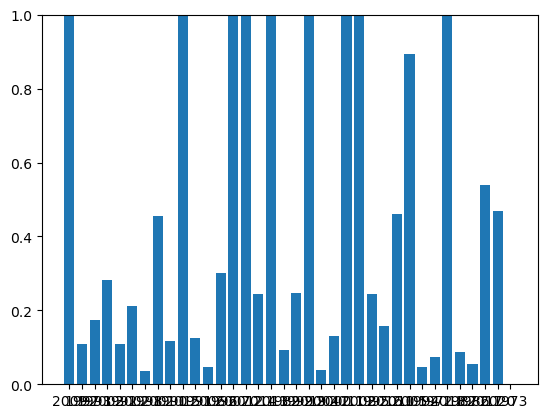

In [14]:
#display results for microplastics over time

sample_df = clean_microplastics_df.sample(n=1000)
sample_df.head()

x_values = sample_df["Year"]
y_values = sample_df["Measurement"]
plt.ylim(0,1)
plt.bar(x_values,y_values)
plt.show()


In [ ]:
# sample_df.boxplot(column="Measurement",by="Date")
# plt.show()

In [ ]:
#display results for cancer rates over time 

In [ ]:
#display regression plots 